In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline

In [6]:
X, y = make_regression(n_samples=200, n_features=50, noise=20, random_state=42)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
alphas = np.logspace(-3, 1, 10)
l1_ratios = [0.2, 0.5, 0.8]  # 0 = Ridge, 1 = Lasso

In [22]:
elastic_coefs = {}

for l1 in l1_ratios:
    coefs = []
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=5000, tol=0.01, random_state=42)
        model.fit(X_scaled, y)
        coefs.append(model.coef_)
    elastic_coefs[l1] = np.array(coefs)

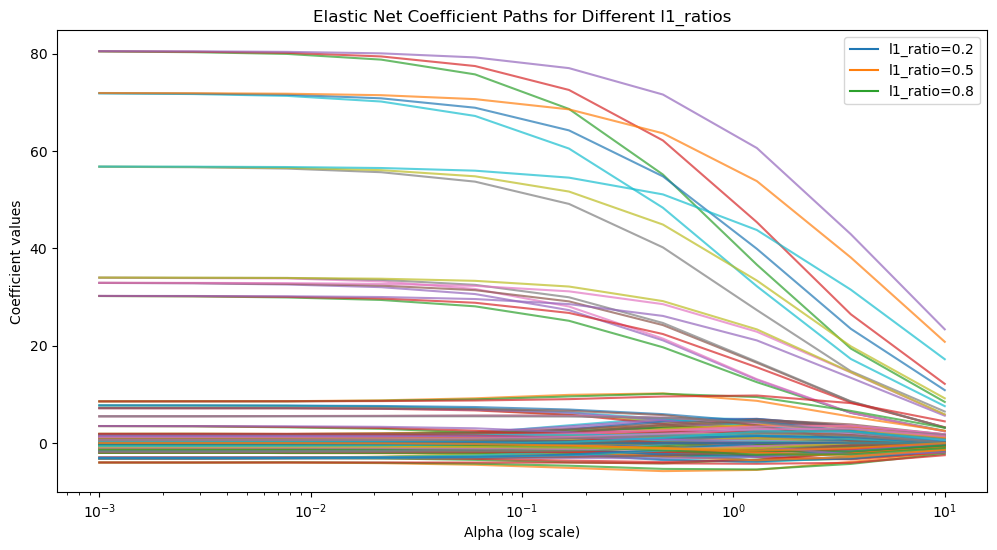

In [26]:
# Plot coefficient paths for Elastic Net
plt.figure(figsize=(12, 6))

for l1, coefs in elastic_coefs.items():
    # coefs.shape = (len(alphas), n_features)
    for coef in coefs.T:  # loop over features
        plt.plot(alphas, coef, alpha=0.7)
    plt.plot([], [], label=f"l1_ratio={l1}")  # dummy for legend

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient values")
plt.title("Elastic Net Coefficient Paths for Different l1_ratios")
plt.legend()
plt.show()

In [28]:
ridge = Ridge(alpha=1).fit(X_scaled, y)
lasso = Lasso(alpha=1, max_iter=5000).fit(X_scaled, y)
elastic = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=5000).fit(X_scaled, y)

print("Model MSE Comparison:")
print(f" Ridge MSE: {np.mean((ridge.predict(X_scaled) - y) ** 2):.4f}")
print(f" Lasso MSE: {np.mean((lasso.predict(X_scaled) - y) ** 2):.4f}")
print(f" Elastic Net MSE: {np.mean((elastic.predict(X_scaled) - y) ** 2):.4f}")

Model MSE Comparison:
 Ridge MSE: 313.5474
 Lasso MSE: 355.7893
 Elastic Net MSE: 2399.7123
